# **Sentiment Analysis of IMDB Movie Reviews**

</br>

**Dataset**
</br>

The IMDb Dataset of 50K Movie Reviews, is a popular dataset commonly used for sentiment analysis and natural language processing tasks. The dataset consists of 50,000 movie reviews, with 25,000 reviews labeled as positive and 25,000 as negative
</br>

Dataset Source: [Kaggle](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?datasetId=134715&searchQuery=pytor)
</br>

**The Problem Statement**
</br>

Predict the sentiment (positive or negative) of movie reviews using deep learning techniques.

**Approach Outline:**

- **Data Preprocessing:** Apply preprocessing steps to clean and prepare the text data for analysis. Check the "Data_preprocessing_notebook" for detailed steps.

- **Padding:** Pad the preprocessed text sequences to ensure they have the same length, as deep learning models typically require fixed-length inputs.

- **Word Embedding:** Convert the preprocessed text into a numerical representation using word embeddings (such as Word2Vec ) to represent words as dense vectors in a continuous vector space.

- **Model Training:** Split the dataset into training and test sets and train deep learning models on the training data.

- **Model Selection:** Choose a suitable deep learning model architecture, such as recurrent neural networks (RNNs), long short-term memory (LSTM) networks, or Bidirectional, to build the sentiment analysis model.

- **Model Evaluation:** Evaluate the trained model's performance on the test set, considering metrics such as accuracy, precision, recall,  F1 score an as well as ROC-AUC Curves


**(Initial) Attributes**:

* Review
* Sentiment
 

## All the imports

In [47]:
# import to "ignore" warnings
import warnings
warnings.filterwarnings('ignore')

# imports for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re 

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import nltk 
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\stavp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\stavp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## def_preprocessing

In [48]:
# Define the word mapping dictionary
mapping = {
    "ain't": "is not", "aren't": "are not", "can't": "cannot", "'cause": "because", "could've": "could have",
    "couldn't": "could not", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not",
    "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'll": "he will", "he's": "he is",
    "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would",
    "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have",
    "i'd": "i would", "i'd've": "i would have", "i'll": "i will", "i'll've": "i will have", "i'm": "i am",
    "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will",
    "it'll've": "it will have", "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not",
    "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have",
    "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
    "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have",
    "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have",
    "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have", "so's": "so as",
    "this's": "this is", "that'd": "that would", "that'd've": "that would have", "that's": "that is",
    "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is",
    "they'd": "they would", "they'd've": "they would have", "they'll": "they will",
    "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
    "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will",
    "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not",
    "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is",
    "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did",
    "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have",
    "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have",
    "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have",
    "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
    "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have",
    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
    "you're": "you are", "you've": "you have"
}

# Get all the English stopwords
stopwords = set(stopwords.words('english'))

# Initialize a Porter stemmer to stem each word of the review dataset
stemmer = PorterStemmer()

# Initialize corpus list to store all words in the dataset
corpus = []

def preprocessing(data):
    data = data.lower()  # Convert text to lowercase
    data = re.sub(r"http\S+", " ", data)  # Remove hyperlinks from the text
    data = re.sub(r"<.*?>", " ", data)  # Remove HTML tags from the text
    data = re.sub(r"\d+", " ", data)  # Remove numbers from the text
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data = emoji_pattern.sub(r'', data)  # Remove emojis from the text
    punctuations = '[’!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]+'  # Define punctuation symbols
    data = re.sub(punctuations, ' ', data)  # Remove punctuation symbols from the text
    data = re.sub(r'\s{2,}', ' ', data)  # Remove double whitespaces
    words = data.split()  # Split the text into individual words
    processed_words = []  # Initialize list to store processed words

    for word in words:
        if word not in stopwords:  # Check if the word is not a stopword
            word = stemmer.stem(word)  # Stem the word using Porter stemmer
            if word in mapping:
                word = mapping[word]  # Map the word to its expanded form if it exists in the mapping dictionary
            processed_words.append(word)  # Add the processed word to the list
            corpus.extend(processed_words)  # Add the processed word to the corpus list

    cleaned_sentence = " ".join(processed_words)  # Join the processed words to form a cleaned sentence
    return cleaned_sentence


## def_encoding

In [49]:
# Function to encode the preprocessed text
def encode_text(text):
    input_length = 750
    vocab_length = 35000  # Maximum number of words to keep based on their frequency
    tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
    tokenizer.fit_on_texts(text)  # Fit the tokenizer on the input data to learn the vocabulary based on the provided texts
    tokenizer.num_words = vocab_length  # Limit the number of words considered during tokenization
    encoded_text = pad_sequences(tokenizer.texts_to_sequences(text), maxlen=input_length)
    return encoded_text

## def_predict_sentiment

In [50]:
# Function to predict the sentiment
def predict_sentiment(review):
    for i in range(len(review)):
        review[i] = preprocessing(review[i])
    encoded_review = encode_text(review)
    predictions = model.predict(encoded_review)
    sentiments = ["Positive" if prediction > 0.5 else "Negative" for prediction in predictions]
    return sentiments


## Demo example

In [51]:
# Load the saved model
model = load_model('training_model3.h5')

reviews = [
    "This movie is a must-watch! It's a masterpiece.",
    "I was let down by this film. It didn't meet my expectations.",
    "The performances in this movie are outstanding.",
    "The plot was confusing, and the pacing was off.",
    "I was deeply moved by the emotional impact of this film.",
    "The characters lacked depth, and the dialogue felt forced.",
    "This movie was absolutely fantastic! I loved every moment of it.",
    "The ending of the movie left me unsatisfied."]
    

# Labels for the reviews
True_labels = ['Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
          'Positive', 'Negative']


# Predict sentiment for all reviews
sentiments = predict_sentiment(reviews)

# Create a pandas DataFrame with reviews, labels, and sentiments
df = pd.DataFrame({'Review': reviews, 'True_labels': True_labels, 'Sentiment': sentiments})

# Add a column to indicate whether each prediction is correct
df['Prediction Correct'] = np.where( df['True_labels'] == df['Sentiment'], "Correct_predicted", "")

# Count the number of correct predictions
num_correct = sum(df['Prediction Correct'] == 'Correct_predicted')

# Print the DataFrame and the number of correct predictions
display(df)
print(f"Number of Correct Predictions: {num_correct} out of {len(df['Prediction Correct'])}")

1/1 [==============================] - 1s 629ms/step


,Review,True_labels,Sentiment,Prediction Correct
0,movi must watch masterpiec,Positive,Positive,Correct_predicted
1,let film meet expect,Negative,Positive,
2,perform movi outstand,Positive,Positive,Correct_predicted
3,plot confus pace,Negative,Negative,Correct_predicted
4,deepli move emot impact film,Positive,Positive,Correct_predicted
5,charact lack depth dialogu felt forc,Negative,Negative,Correct_predicted
6,movi absolut fantast love everi moment,Positive,Positive,Correct_predicted
7,end movi left unsatisfi,Negative,Negative,Correct_predicted


Number of Correct Predictions: 7 out of 8


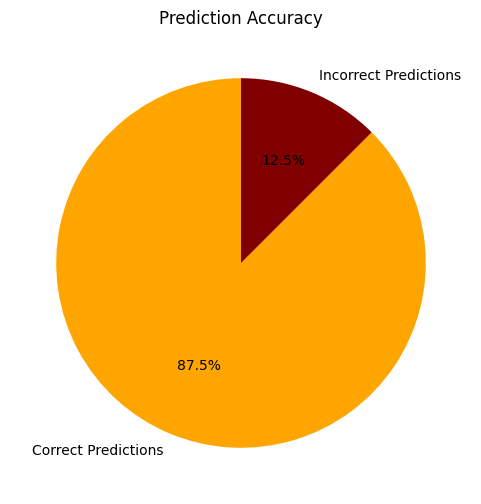

In [52]:
# Count the number of correct and incorrect predictions
num_correct = sum(df['Prediction Correct'] == 'Correct_predicted')
num_incorrect = len(df) - num_correct

# Data for the pie chart
data = [num_correct, num_incorrect]
labels = ['Correct Predictions', 'Incorrect Predictions']
colors = ['orange', 'maroon']  # Custom colors for the pie slices

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Prediction Accuracy')

# Display the pie chart
plt.show()